# Cell 1: Introduction to Exploratory Data Analysis

**Purpose**: This notebook performs exploratory data analysis (EDA) on Brent oil price data to understand its properties (trend, stationarity, volatility) and inform modeling choices for the 10 Academy Week 10 Challenge.

**Objectives**:
- Visualize the raw price series to identify trends and shocks.
- Compute and plot log returns to analyze volatility clustering.
- Test stationarity using the Augmented Dickey-Fuller (ADF) test.

**Input**: `data/raw/BrentOilPrices.csv`
**Output**: Plots saved to `results/figures/` and insights for modeling.

# Cell 2: Import Required Libraries
 **Description**: Import Python libraries necessary for data analysis and visualization.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Add the project root directory
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))
from src.data.data_loader import load_brent_oil_data

# Ensure plots are displayed inline in the notebook
%matplotlib inline

# Cell 3: Load and Preprocess Data
 **Description**: Load Brent oil price data using the data_loader module and preprocess it.

 **Input**: Raw CSV file at 'data/raw/brent_oil_prices.csv'
 
 **Output**: Cleaned DataFrame saved to 'data/processed/cleaned_oil_data.csv'

In [5]:

# Define file paths
RAW_PATH = '../data/raw/BrentOilPrices.csv'
PROCESSED_PATH = '../data/processed/cleaned_oil_data.csv'

# Load data using custom data loader
df = load_brent_oil_data(RAW_PATH, PROCESSED_PATH)

# Display first few rows to verify
print("First 5 rows of cleaned data:")
print(df.head())

c:\Users\hp\Desktop\projects\10 Acadamy -KAIM5\brent-oil-changepoint-analysis\notebooks\..\src\data\data_loader.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.to_datetime(date_series)


First 5 rows of cleaned data:
        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


# Cell 4: Visualize Raw Price Series
 **Description**: Plot the Brent oil price series to identify trends and shocks.

 **Input**: Cleaned DataFrame with 'Date' and 'Price' columns
 
 **Output**: Plot saved to 'results/figures/price_series.png'

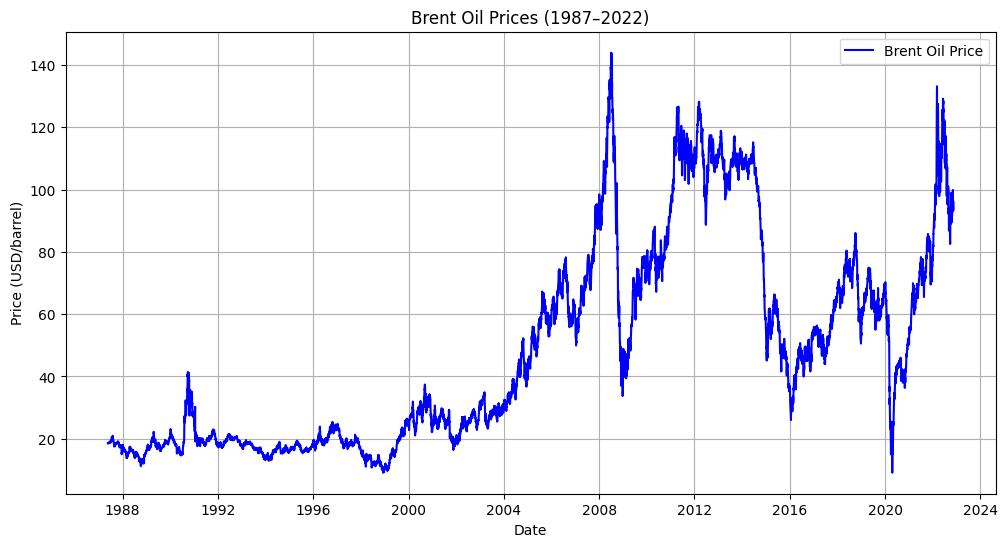

In [6]:

# Define output path for figures
FIGURES_PATH = '../results/figures/'

# Create figure for price series
plt.figure(figsize=(12, 6))
# Plot price against date
plt.plot(df['Date'], df['Price'], label='Brent Oil Price', color='blue')
# Add title and labels
plt.title('Brent Oil Prices (1987–2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD/barrel)')
# Add legend and grid
plt.legend()
plt.grid(True)
# Save plot
plt.savefig(f'{FIGURES_PATH}price_series.png')
# Display plot
plt.show()

# Cell 5: Compute and Visualize Log Returns
 **Description**: Compute log returns to analyze volatility and plot the results.

 **Input**: Cleaned DataFrame with 'Price' column
 
 **Output**: Plot saved to 'results/figures/log_returns.png'

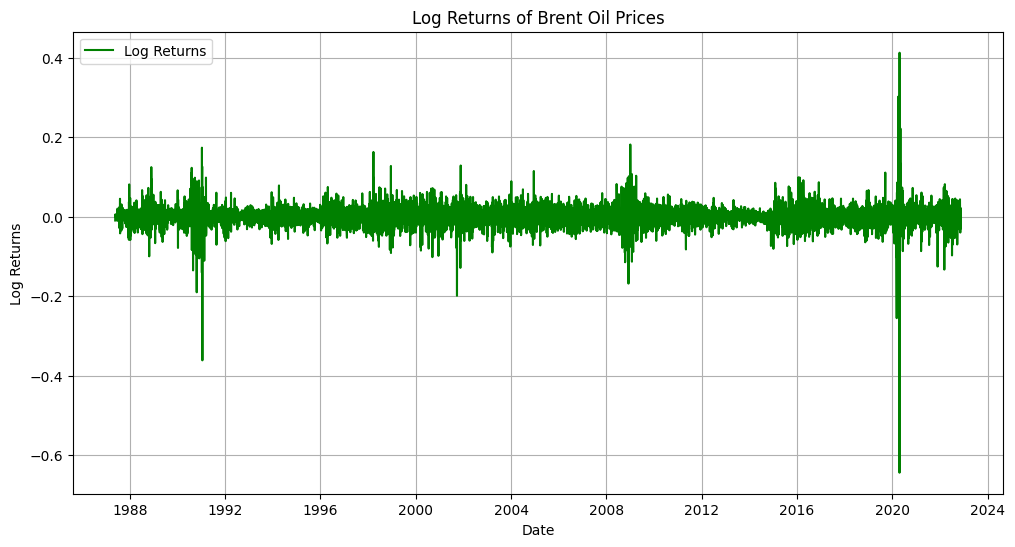

In [7]:
# Compute log prices
df['Log_Price'] = np.log(df['Price'])
# Compute log returns as difference of log prices
df['Log_Returns'] = df['Log_Price'].diff()

# Create figure for log returns
plt.figure(figsize=(12, 6))
# Plot log returns against date
plt.plot(df['Date'], df['Log_Returns'], label='Log Returns', color='green')
# Add title and labels
plt.title('Log Returns of Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Log Returns')
# Add legend and grid
plt.legend()
plt.grid(True)
# Save plot
plt.savefig(f'{FIGURES_PATH}log_returns.png')
# Display plot
plt.show()

# Cell 6: Perform Stationarity Test
 **Description**: Conduct Augmented Dickey-Fuller (ADF) test to check stationarity of price and log returns.

 **Input**: Cleaned DataFrame with 'Price' and 'Log_Returns' columns
 
 **Output**: Printed ADF test results

In [8]:

# Test stationarity of raw price series
result_price = adfuller(df['Price'].dropna())
print('ADF Test for Raw Price Series:')
print('ADF Statistic:', result_price[0])
print('p-value:', result_price[1])
print('Critical Values:', result_price[4])

# Test stationarity of log returns
result_returns = adfuller(df['Log_Returns'].dropna())
print('\nADF Test for Log Returns:')
print('ADF Statistic:', result_returns[0])
print('p-value:', result_returns[1])
print('Critical Values:', result_returns[4])

# Interpret results
print('\nInterpretation:')
print('Raw Price p-value > 0.05 suggests non-stationarity (expected for price data).')
print('Log Returns p-value < 0.05 suggests stationarity, suitable for modeling.')

ADF Test for Raw Price Series:
ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287
Critical Values: {'1%': np.float64(-3.4310783342658615), '5%': np.float64(-2.861861876398633), '10%': np.float64(-2.566941329781918)}

ADF Test for Log Returns:
ADF Statistic: -16.427113494485894
p-value: 2.4985801611428892e-29
Critical Values: {'1%': np.float64(-3.4310783342658615), '5%': np.float64(-2.861861876398633), '10%': np.float64(-2.566941329781918)}

Interpretation:
Raw Price p-value > 0.05 suggests non-stationarity (expected for price data).
Log Returns p-value < 0.05 suggests stationarity, suitable for modeling.
